In [38]:
#Import all necessary modules
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

Here I split the data into the feature and target datasets(X and y), make them numpy arrays, and make features a dataframe for clarity 
I'm choosing bmi as the main feature, because 'An increase in body fat is generally associated with increased risk of metabolic diseases such as type 2 diabetes mellitus, hypertension and dyslipidaemia' 
source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1890993/

In [39]:
X, y= load_diabetes(return_X_y=True)

names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X = np.array(X)
target = np.array(y)
features = pd.DataFrame(X, columns = names)
feature = np.array(features.loc[:,'bmi'])
feature = feature.reshape(-1,1) #This is because LinearRegression requires a 2D array
feature_test, feature_training = feature[:20], feature[20:]
target_test, target_training = target[:20], target[20:]
features


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [40]:
#Create Linear Model and create predictions 


reg = linear_model.LinearRegression()

reg.fit(feature_training, target_training)




LinearRegression()

In [41]:
#Print Predictions, Coefficients, and MSE
pred = reg.predict(feature_test)
print('First ten predictions:', pred[0:10])

print("Coefficients:", reg.coef_)
from math import sqrt
print("Root mean squared error:" , sqrt(mean_squared_error(target_test, pred)))


First ten predictions: [212.00453288 102.7248083  195.35238437 141.23290172 117.29543824
 113.13240111 106.88784542 150.59973525 212.00453288 190.14858796]
Coefficients: [965.62221462]
Root mean squared error: 57.612917583342295


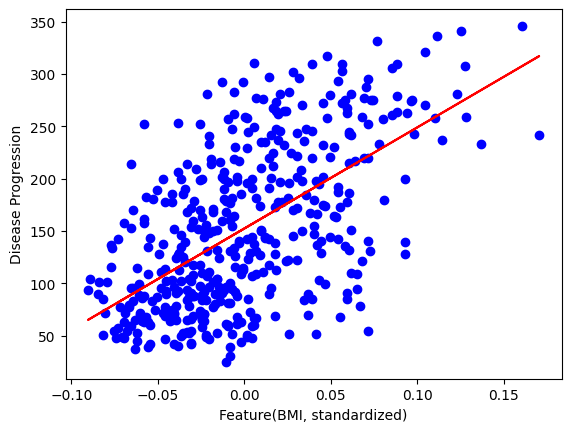

In [42]:
#Produce Visualization 

plt.scatter(feature, y, color = 'blue')
plt.plot(feature, reg.predict(feature), color = 'red')
plt.xlabel('Feature(BMI, standardized)')
plt.ylabel('Disease Progression')
plt.show()